In [ ]:
from __future__ import print_function
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image
import cv2
import seaborn as sns; sns.set()
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping

The dataset size is around 160 MB. After the code finishes running, the dataset is going to be stored automatically to X_train, y_train, X_test and y_test variables, where the training and testing data itself consist of 50000 and 10000 samples respectively

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


Since it’s kind a difficult to interpret  encoded labels, so we created a list of actual label names:

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

We need to normalize array values. We know that by default the brightness of each pixel in any image are represented using a value which ranges between 0 and 255. In order for neural network to work best, we need to convert this value such that it’s going to be in the range between 0 and 1.

In [ ]:
x_train  = x_train/255
x_test  = x_test/255

Our labels y_train and y_test? Those are still in form of a single number ranging from 0 to 9 stored in array. such labels are not the one that a neural network expect. Instead, all those labels should be in form of one-hot representation.

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [ ]:
one_hot_encoder.fit(y_train)

OneHotEncoder(sparse=False)

In [ ]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [ ]:
num_classes = 10

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:],name='conv1'))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same',name='conv2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512,name='fc1'))
model.add(Activation('relu'))
model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

**train the model**

In [ ]:
batch_size = 32
epochs = 50
model_history = model.fit(x_train, y_train, batch_size=batch_size,
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/50
1562/1562 [==============================] - 16s 5ms/step - loss: 1.8530 - accuracy: 0.3417 - val_loss: 1.7059 - val_accuracy: 0.4033
Epoch 2/50
1562/1562 [==============================] - 7s 4ms/step - loss: 1.5693 - accuracy: 0.4447 - val_loss: 1.4699 - val_accuracy: 0.4760
Epoch 3/50
1562/1562 [==============================] - 7s 4ms/step - loss: 1.4128 - accuracy: 0.5010 - val_loss: 1.3987 - val_accuracy: 0.5057
Epoch 4/50
1562/1562 [==============================] - 7s 5ms/step - loss: 1.3037 - accuracy: 0.5416 - val_loss: 1.4008 - val_accuracy: 0.4982
Epoch 5/50
1562/1562 [==============================] - 7s 5ms/step - loss: 1.2124 - accuracy: 0.5731 - val_loss: 1.2041 - val_accuracy: 0.5749
Epoch 6/50
1562/1562 [==============================] - 7s 4ms/step - loss: 1.1259 - accuracy: 0.6034 - val_loss: 1.1814 - val_accuracy: 0.5853
Epoch 7/50
1562/1562 [==============================] - 7s 5ms/step - loss: 1.0492 - accuracy: 0.6309 - val_loss: 1.1557 - val_accuracy

In [ ]:
model.save('M0.h5')

In [ ]:
from keras import models
model = models.load_model('M0.h5')

In [ ]:
predictions = model.predict(x_test)
predictions = one_hot_encoder.inverse_transform(predictions)
y_test = one_hot_encoder.inverse_transform(y_test)

In [ ]:
cm = confusion_matrix(y_test, predictions)

In [ ]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

In [ ]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
num_classes = 10

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

**Constructing CNN**

you can notice that the output layer of this network consists of 10 neurons with softmax activation function. The reason is because in this classification task we got 10 different classes in which each of those is represented by each neuron in that layer. The use of softmax activation function itself is to obtain probability score of each predicted class.

The next step we do is compiling the model. In this case we are going to use categorical cross entropy loss function because we are dealing with multiclass classification. By the way if we perform binary classification task such as cat-dog detection, we should use binary cross entropy loss function instead. To the optimizer, we are using SGD optimizer here . Lastly, we use acc (accuracy) to keep track of my model performance as the training process goes.

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:],name='conv1'))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same',name='conv2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512,name='fc1'))
model.add(Activation('relu'))
model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau


batch_size = 32
epochs = 60



filepath = 'M0-weights.hdf5'
model_chk = ModelCheckpoint(filepath, monitor='val_loss', verbose=0,
                            save_best_only=True,
                            save_weights_only=True, mode='auto',
                            period=1)

csv_log = CSVLogger('M0-training.log')

model_history = model.fit(x_train, y_train, batch_size=batch_size,
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=[model_chk, csv_log])

Epoch 1/60
1562/1562 [==============================] - 8s 5ms/step - loss: 1.8279 - accuracy: 0.3499 - val_loss: 1.6892 - val_accuracy: 0.4047
Epoch 2/60
1562/1562 [==============================] - 7s 4ms/step - loss: 1.5549 - accuracy: 0.4503 - val_loss: 1.4648 - val_accuracy: 0.4913
Epoch 3/60
1562/1562 [==============================] - 6s 4ms/step - loss: 1.4065 - accuracy: 0.5043 - val_loss: 1.3632 - val_accuracy: 0.5155
Epoch 4/60
1562/1562 [==============================] - 6s 4ms/step - loss: 1.2967 - accuracy: 0.5421 - val_loss: 1.2958 - val_accuracy: 0.5347
Epoch 5/60
1562/1562 [==============================] - 7s 5ms/step - loss: 1.2095 - accuracy: 0.5730 - val_loss: 1.1874 - val_accuracy: 0.5858
Epoch 6/60
1562/1562 [==============================] - 7s 4ms/step - loss: 1.1205 - accuracy: 0.6054 - val_loss: 1.1588 - val_accuracy: 0.5887
Epoch 7/60
1562/1562 [==============================] - 6s 4ms/step - loss: 1.0407 - accuracy: 0.6336 - val_loss: 1.1055 - val_accuracy:

In [ ]:
from __future__ import print_function
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


# This time we will only use the test set:
_, (x_test, y_test) = cifar10.load_data()
x_test = x_test.astype('float32')
x_test /= 255
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
num_classes = 10

y_test = np_utils.to_categorical(y_test, num_classes)

10000 test samples


Define the location of our pre-trained weights path and also specifiy a directory to store our generated output

In [ ]:
import os

weights_path = 'M0-weights.hdf5'
out_dir = 'M0-features'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:],name='conv1'))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same',name='conv2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512,name='fc1'))
model.add(Activation('relu'))
model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

model.summary()

model.load_weights(weights_path)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 activation_8 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
import numpy as np

feat_extractor = Model(inputs=model.input,
                       outputs=model.get_layer('fc1').output)

features = feat_extractor.predict(x_test, batch_size=batch_size)

np.save(os.path.join(out_dir, 'fc1_features.npy'), features)

**Plotting the Results**

**PCA** 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(features)
pca_features = pca.transform(features)

np.save(os.path.join(out_dir, 'fc1_features_pca_2dim.npy'), pca_features)

In [ ]:
tx, ty = pca_features[:,0], pca_features[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

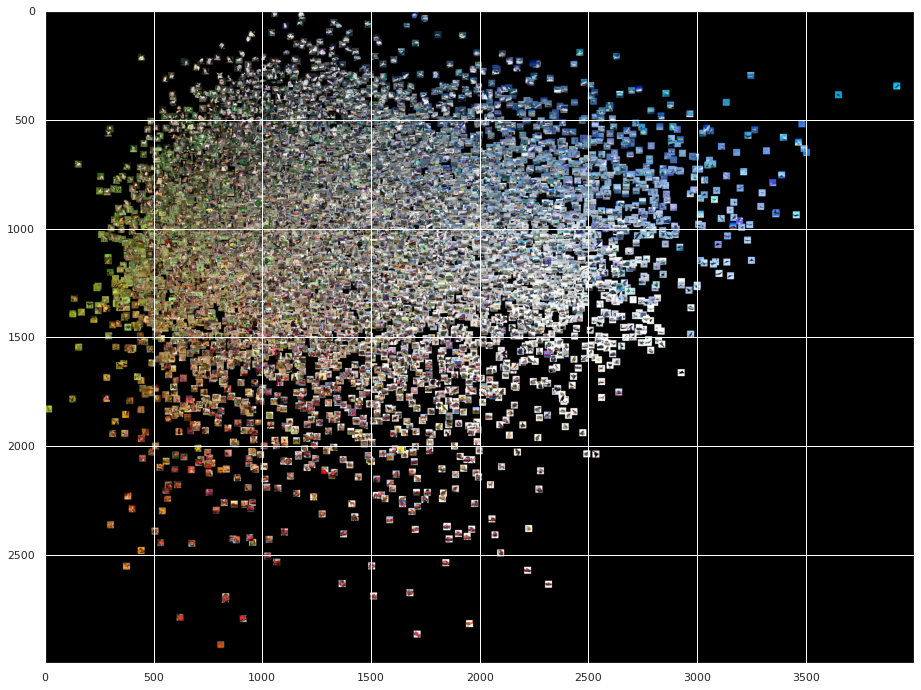

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGB', (width, height))
for idx, x in enumerate(x_test):
    tile = Image.fromarray(np.uint8(x * 255))
    #tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]), int((height-max_dim) * ty[idx])))

%matplotlib inline
plt.figure(figsize = (16,12))
plt.imshow(full_image)

In [ ]:
full_image.save(os.path.join(out_dir, "fc1_pca.jpg"))

**PCA (50 dimensions)**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(features)
pca_features = pca.transform(features)

np.save(os.path.join(out_dir, 'fc1_features_pca_50dim.npy'), pca_features)

**Now we are using t-SNE to compress down further.**

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE().fit_transform(pca_features)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
np.save(os.path.join(out_dir, 'fc1_features_pca_50dim_tsne.npy'), tsne)

In [ ]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

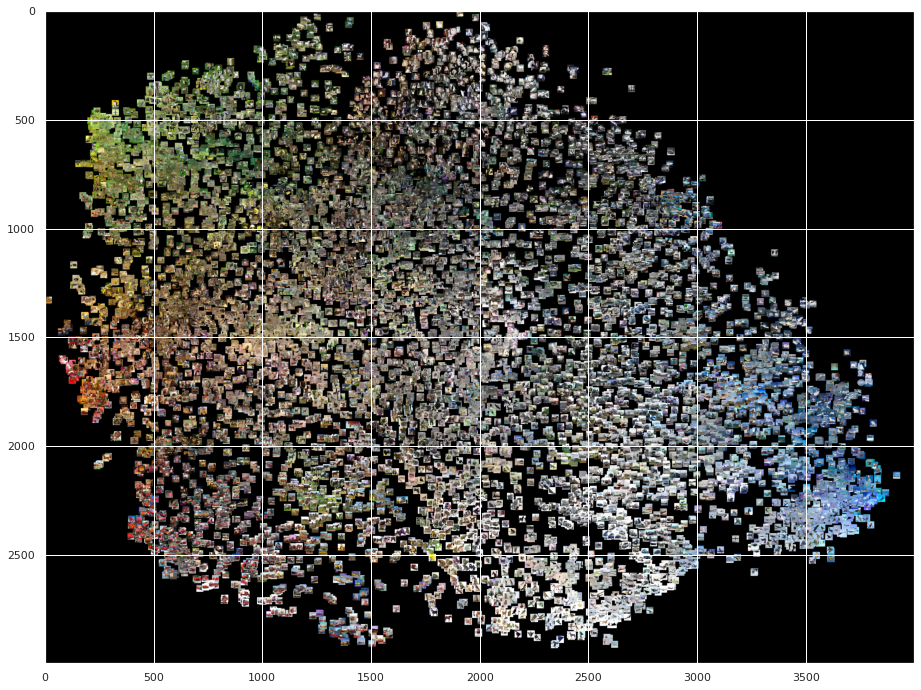

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGB', (width, height))
for idx, x in enumerate(x_test):
    tile = Image.fromarray(np.uint8(x * 255))
    #tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]), int((height-max_dim) * ty[idx])))

%matplotlib inline
plt.figure(figsize = (16,12))
plt.imshow(full_image)

**t-SNE with Default Settings** 


In [ ]:
from sklearn.manifold import TSNE

features = np.load(os.path.join(out_dir, 'fc1_features.npy'))
tsne = TSNE().fit_transform(features)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
np.save(os.path.join(out_dir, 'fc1_features_tsne_default.npy'), tsne)

In [ ]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

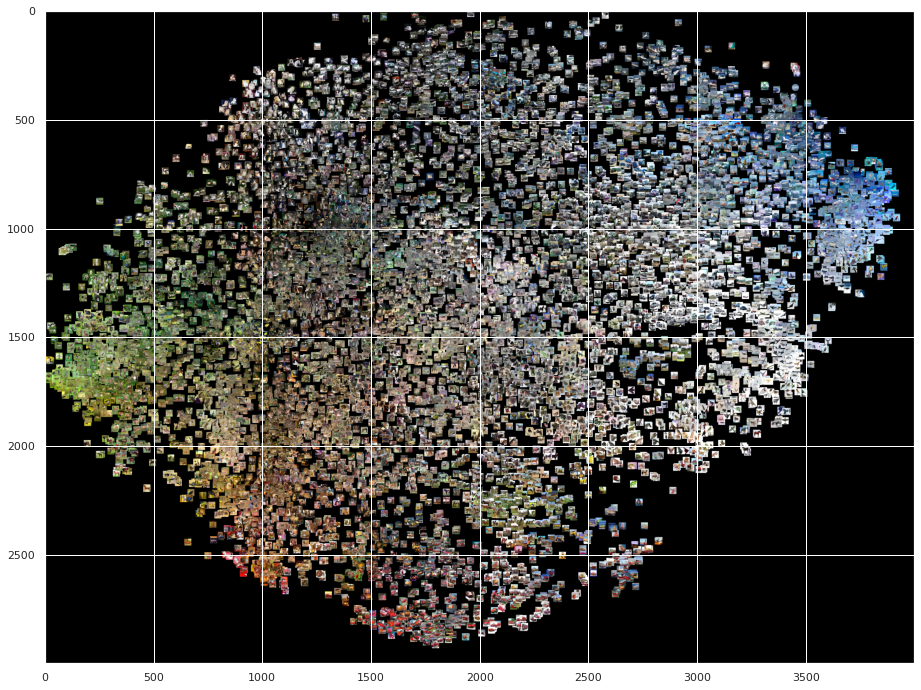

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGB', (width, height))
for idx, x in enumerate(x_test):
    tile = Image.fromarray(np.uint8(x * 255))
    #tile = Image.open(img)
    rs = max(1, tile.width / max_dim, tile.height / max_dim)
    tile = tile.resize((int(tile.width / rs),
                        int(tile.height / rs)),
                       Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]),
                            int((height-max_dim) * ty[idx])))

%matplotlib inline
plt.figure(figsize = (16,12))
plt.imshow(full_image)

In [ ]:
full_image.save(os.path.join(out_dir, "fc1_features_tsne_default.jpg"))

Now we have re-do the t-SNE plot, but this time we are displaying categories rather than images

In [ ]:
# have to re-load cifar to get y_test back in its original form
_, (x_test, y_test) = cifar10.load_data()

y_test = np.asarray(y_test)

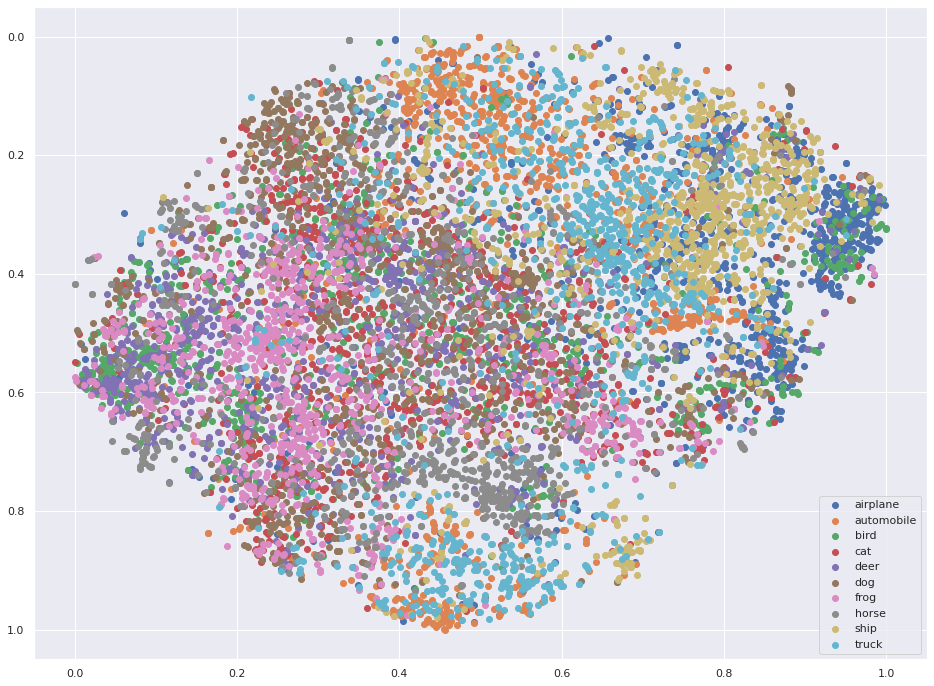

In [ ]:
plt.figure(figsize = (16,12))

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(len(classes)):
    y_i = y_test == i
    plt.scatter(tx[y_i[:, 0]], ty[y_i[:, 0]], label=classes[i])
plt.legend(loc=4)
plt.gca().invert_yaxis()
plt.savefig(os.path.join(out_dir, "fc1_features_tsne_default_pts.jpg"), bbox_inches='tight')
plt.show()

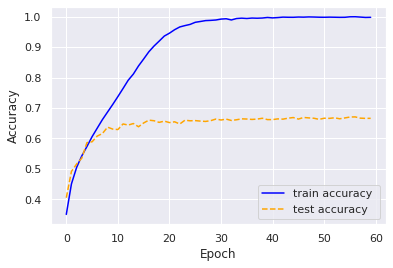

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(model_history.history['accuracy'],
         label='train accuracy ',
         c='blue', ls='-')
plt.plot(model_history.history['val_accuracy'],
         label='test accuracy ',
         c='orange',ls='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

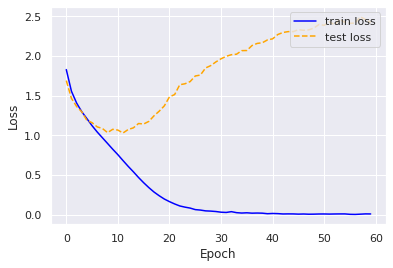

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(model_history.history['loss'],
         label='train loss',
         c='blue', ls='-')
plt.plot(model_history.history['val_loss'],
         label='test loss',
         c='orange',ls='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

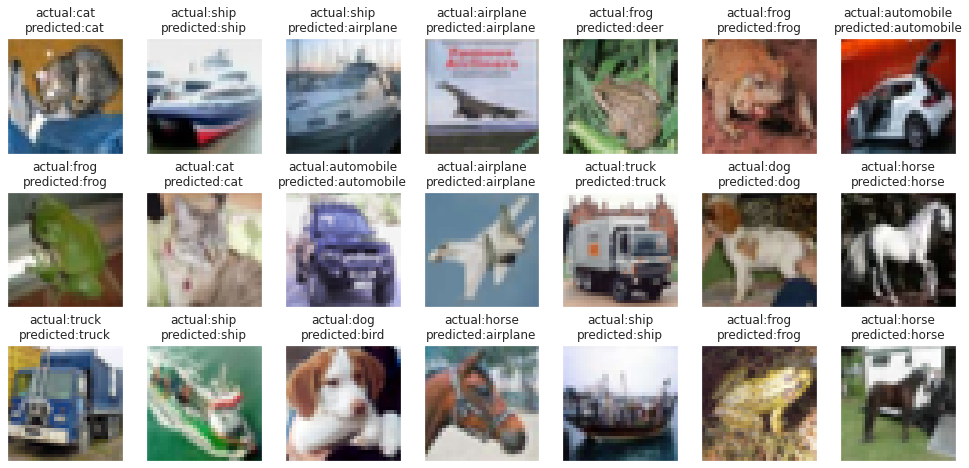

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + classes[y_test[index][0]] + '\n' 
                            + 'predicted:' + classes[predictions[index][0]])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

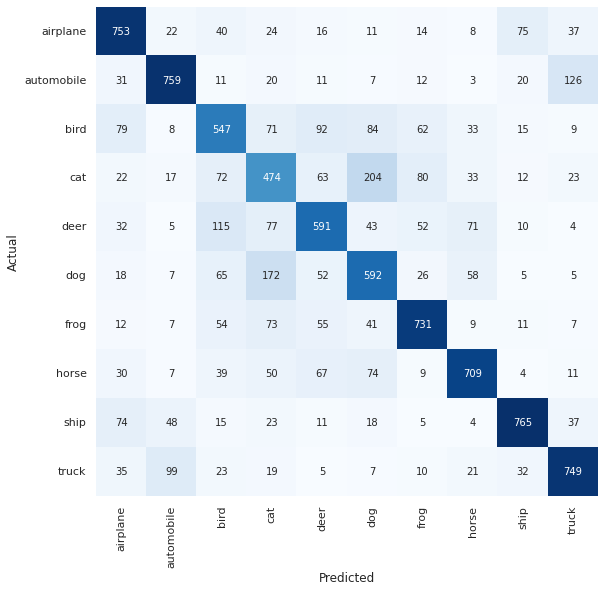

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes,fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()